Plan:
* Clean Data

* Train:Test Split
* Scale train and test

* Fit model

# Code Notes

In [1]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


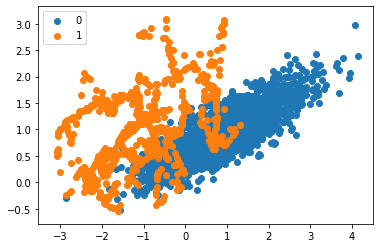

In [12]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter = Counter(y)
print(counter)

# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y = pipeline.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# Code Notes Pipeline

In [32]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline # doctest: +NORMALIZE_WHITESPACE

In [33]:
X, y = make_classification(n_classes=2, 
                           class_sep=2, 
                           weights=[0.1, 0.9], 
                           n_informative=3, 
                           n_redundant=1, 
                           flip_y=0, 
                           n_features=20, 
                           n_clusters_per_class=1, 
                           n_samples=1000, 
                           random_state=10)

print('Original dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({1: 900, 0: 100})


In [38]:
smt = SMOTE(random_state=42)
# Classifier
knn = KNN()

pipeline = Pipeline([('smt', smt), ('knn', knn)])

X_train, X_test, y_train, y_test = tts(X, y, random_state=42)

pipeline.fit(X_train, y_train) # doctest: +ELLIPSIS




pipe = Pipeline([('smote', smote), ('classifier', classifier)])

param_grid = {
    
#     'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [10],
    'classifier__min_samples_split': [10],
}

gs = GridSearchCV(pipe, param_grid, cv = 5, scoring='f1')
gs.fit(X_train, y_train)

Pipeline(steps=[('smt', SMOTE(random_state=42)),
                ('knn', KNeighborsClassifier())])

In [39]:
y_hat = pipeline.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        26
           1       1.00      0.98      0.99       224

    accuracy                           0.98       250
   macro avg       0.93      0.99      0.96       250
weighted avg       0.99      0.98      0.98       250



# Code Test

In [20]:
# Dataframes
import pandas as pd
import numpy as np

# Graphing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Preparation
    # Train:Test
from sklearn.model_selection import train_test_split
    # Scaling
from sklearn.preprocessing import RobustScaler
# Resampling Methods
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Model Tuning and Cross Validation
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

# Model metrics
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

## Import Data

In [3]:
df = pd.read_csv('../data/processed/cleaned_dataframe.gz', compression='gzip')
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


## T:t split

In [4]:
X = df.drop(['Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    stratify=y, 
                                                    random_state=1)

print("No. of samples in each training set:\t{}".format(X_train.shape[0]))
print("No. of samples in each test set:\t{}".format(X_test.shape[0]))

No. of samples in each training set:	199364
No. of samples in each test set:	85443


## Scale

In [5]:
scaler = RobustScaler()

# Fit scaler on training data and transform Training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the scaler to transform the Test data
X_test_scaled = scaler.transform(X_test)

## Fit Model

### Basic fit, no pipeline or grid

In [29]:
classifier = RandomForestClassifier()
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [31]:
test_predictions = classifier.predict(X_test)

print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, test_predictions)))
print('Test Precision: ' + str(metrics.precision_score(y_test, test_predictions)))
print('Test Recall: ' + str(metrics.recall_score(y_test, test_predictions)))
print('Test F1: ' + str(metrics.f1_score(y_test, test_predictions)))

Test Accuracy: 0.9995552590615966
Test Precision: 0.8985507246376812
Test Recall: 0.8378378378378378
Test F1: 0.8671328671328672


### Basic fit with pipeline & smote

In [32]:
smote = SMOTE(random_state=1)
classifier = RandomForestClassifier()

pipeline = Pipeline([('smote', smote), ('classifier', classifier)])
param_grid = {'classifier__max_depth': [10], 
              'classifier__min_samples_split': [10]
             }

In [46]:
# model = GaussianNB()
# model.fit(X_train_scaled, y_train)

# y_pred = model.predict(X_test_scaled)

In [22]:
smote = SMOTE(random_state=1)
classifier = RandomForestClassifier(class_weight={0: 1, 1: 2}, n_estimators=30, n_jobs=-1)

pipeline = Pipeline([('smote', smote), ('classifier', classifier)])

param_grid = {
    
#     'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [10, 12],
    'classifier__min_samples_split': [8, 10],
}

In [23]:
gs = GridSearchCV(pipeline, param_grid, cv = 5, scoring='f1')
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=1)),
                                       ('classifier',
                                        RandomForestClassifier(class_weight={0: 1,
                                                                             1: 2},
                                                               n_estimators=30,
                                                               n_jobs=-1))]),
             param_grid={'classifier__max_depth': [10, 12],
                         'classifier__min_samples_split': [8, 10]},
             scoring='f1')

In [24]:
print("Best parameters:", gs.best_params_)
print("Best score:", gs.best_score_)

Best parameters: {'classifier__max_depth': 12, 'classifier__min_samples_split': 8}
Best score: 0.5441938137305506


In [25]:
test_predictions = gs.predict(X_test)
test_probabilities = gs.predict_proba(X_test)

Test Accuracy: 0.9989700736163291
Test Precision: 0.6807228915662651
Test Recall: 0.7635135135135135
Test F1: 0.7197452229299363


Confusion Matrix: 
TN: 85242 FP: 53 FN: 35 TP: 113


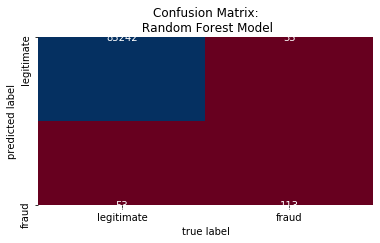

In [26]:
print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, test_predictions)))
print('Test Precision: ' + str(metrics.precision_score(y_test, test_predictions)))
print('Test Recall: ' + str(metrics.recall_score(y_test, test_predictions)))
print('Test F1: ' + str(metrics.f1_score(y_test, test_predictions)))
print('\n')
    

# print confusion matrix    
cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm.T, square=True, annot=True, fmt = 'g', cmap='RdBu', cbar=False, xticklabels=['legitimate', 'fraud'], yticklabels=['legitimate', 'fraud'])
plt.title('Confusion Matrix:\n Random Forest Model')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('cm_randomforest')

tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
print("Confusion Matrix:",'\nTN:', tn, 'FP:', fp, 'FN:', fn, 'TP:', tp)

In [28]:
pipeline.fit(X_train_scaled, y_train)

y_hat = pipeline.predict(X_test_scaled)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.86      0.87       148

    accuracy                           1.00     85443
   macro avg       0.94      0.93      0.94     85443
weighted avg       1.00      1.00      1.00     85443



# RF Code

In [ ]:
y = df['Target']
X = df.drop(['Target'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
# data_train = X_train, target_train = y_train

In [ ]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(data_train, target_train)

In [ ]:
# Training accuracy score
forest.score(data_train, target_train)

In [ ]:
# Test accuracy score
forest.score(data_test, target_test)

In [ ]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [ ]:
plot_feature_importances(forest)

In [ ]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

In [ ]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

# Learn.co RF GS

## Data Clean

In [33]:
# Import data
df = pd.read_csv('example.csv')

In [ ]:
# Clean Data

## T:t Split

In [ ]:
y = df['class']
X = df.drop(['class'], axis=1)
X.head()

do a train-test split to create a holdout set to evaluate how good our final model is.

When we make modeling decisions based on a section of our data, we risk overfitting to that data.  Make use of Cross Validation when using GridSearchCV to do model selection and hyperparameter tuning, then test our final model choice on the test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Build and fit Baseline Model

In [ ]:
# Instantiate a RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=1)

# Use 3-fold cross-validation to generate a baseline score for this model type, so that we have something to compare our tuned model performance to
mean_rf_cv_score = cross_val_score(rf_clf, X_train, y_train, cv=3).mean()
print("Mean Cross Validation Score for Random Forest Classifier: {}%".format(round(mean_rf_cv_score, 2)))

## GridSearch Random Forest

be very thoughtful about what values to test for each parameter

 |     Parameter     |         Values         |
|:-----------------:|:----------------------:|
|    n_estimators   |      [10, 30, 100]     |
|     criterion     |   ['gini', 'entropy']  |
|     max_depth     | [None, 2, 6, 10] |
| min_samples_split |       [5, 10]       |
|  min_samples_leaf |   [3, 6]   |

In [ ]:
rf_param_grid = {'n_estimators': [10,30,100], 
                 'criterion': ['gini', 'entropy'], 
                 'max_depth': [None, 2, 6, 10], 
                 'min_samples_split': [5, 10], 
                 'min_samples_leaf': [3 ,6] 
}

In [ ]:
rf_grid_search = GridSearchCV(rf_clf, 
                              param_grid=rf_param_grid, 
                              cv=3,
                              n_jobs= -1)
# Fit model
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {}%".format(round(rf_grid_search.best_score_, 2)))
print("\n")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Parameter tuning improved performance by X%
This is good vs CLASSIFIER1

Which model to ship to production would depend on several factors:
* How "Noisy" dataset is
    * Noisy = RF is an ensemble method so is more resistant to variance in the data
    * Stable = DT is just as good.
* Which metric is most saught after (accuracy, f1 etc)

## Model performance vs holdout set / test set

In [ ]:
dt_score = dt_grid_search.score(X_test, y_test)
rf_score = rf_grid_search.score(X_test, y_test)

print('Decision tree grid search: ', dt_score)
print('Random forest grid search: ', rf_score)

# Learn.co Pipeline

Scikit-learn's Pipeline class is designed as a manageable way to apply a series of data transformations followed by the application of an estimator

Process:
* Load data
* T:t split
* 

## Just Pipeline with several models

In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
# from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

# Load and split the data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [39]:
# Build pipeline
pipe_lr = Pipeline([('scl', StandardScaler()), 
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=42))])
pipe_svm = Pipeline([('scl', StandardScaler()), 
                     ('pca', PCA(n_components=2)), 
                     ('clf', svm.SVC(random_state=42))])
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', tree.DecisionTreeClassifier(random_state=42))])

In [40]:
# List of pipelines for ease of iteration
pipelines = [pipe_lr, pipe_svm, pipe_dt]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Support Vector Machine', 2: 'Decision Tree'}

In [41]:
# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [42]:
# Compare accuracies
for idx, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

Logistic Regression pipeline test accuracy: 0.900
Support Vector Machine pipeline test accuracy: 0.900
Decision Tree pipeline test accuracy: 0.867


In [43]:
# Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
    if val.score(X_test, y_test) > best_acc:
        best_acc = val.score(X_test, y_test)
        best_pipe = val
        best_clf = idx
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])

Classifier with best accuracy: Logistic Regression


In [ ]:
# Save pipeline to file
joblib.dump(best_pipe, 'best_pipeline.pkl', compress=1)
print('Saved %s pipeline to file' % pipe_dict[best_clf])

## Pipeline with gridsearch on 1 model

https://www.kdnuggets.com/2018/01/managing-machine-learning-workflows-scikit-learn-pipelines-part-2.html

In [53]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import tree

In [45]:
# Load and split the data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [48]:
# Construct pipeline
pipe = Pipeline([('scl', StandardScaler()),
                 ('pca', PCA(n_components=2)),
                 ('clf', tree.DecisionTreeClassifier(random_state=42))])

param_range = [1, 2, 3, 4, 5]

# Set grid search params
grid_params = [{'clf__criterion': ['gini', 'entropy'],
                'clf__min_samples_leaf': param_range,
                'clf__max_depth': param_range,
                'clf__min_samples_split': param_range[1:]}]

In [49]:
# Construct grid search
gs = GridSearchCV(estimator=pipe,
                  param_grid=grid_params,
                  scoring='accuracy',
                  cv=10)

# Fit using grid search
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid=[{'clf__criterion': ['gini', 'entropy'],
                          'clf__max_depth': [1, 2, 3, 4, 5],
                          'clf__min_samples_leaf': [1, 2, 3, 4, 5],
                          'clf__min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [50]:
# Best accuracy
print('Best accuracy: %.3f' % gs.best_score_)

# Best params
print('\nBest params:\n', gs.best_params_)

Best accuracy: 0.917

Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 2, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}


Note that the pipeline is the estimator in the GS.
We then fit at the GS level

## Pipeline, GS, multiple models

https://www.kdnuggets.com/2018/01/managing-machine-learning-workflows-scikit-learn-pipelines-part-3.html

In [61]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [62]:
from sklearn.externals import joblib

ImportError: cannot import name 'joblib' from 'sklearn.externals' (/Users/adam/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/__init__.py)

In [55]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# Load and split the data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
			('clf', LogisticRegression(random_state=42))])

pipe_lr_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([('scml', StandardScaler()),
			('clf', RandomForestClassifier(random_state=42))])

pipe_rf_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
			('clf', svm.SVC(random_state=42))])

pipe_svm_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', svm.SVC(random_state=42))])
			
# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
		'clf__C': param_range_fl,
		'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': param_range,
		'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
		'clf__C': param_range}]

# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=10) 
			
gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=10)
			
gs_rf = GridSearchCV(estimator=pipe_rf,
			param_grid=grid_params_rf,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

gs_rf_pca = GridSearchCV(estimator=pipe_rf_pca,
			param_grid=grid_params_rf,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,
			param_grid=grid_params_svm,
			scoring='accuracy',
			cv=10,
			n_jobs=jobs)

gs_svm_pca = GridSearchCV(estimator=pipe_svm_pca,
			param_grid=grid_params_svm,
			scoring='accuracy',
			cv=10,
			n_jobs=jobs)

# List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_pca, gs_rf, gs_rf_pca, gs_svm, gs_svm_pca]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA', 
		2: 'Random Forest', 3: 'Random Forest w/PCA', 
		4: 'Support Vector Machine', 5: 'Support Vector Machine w/PCA'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train, y_train)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(X_test)
	# Test data accuracy of model with best params
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
	# Track best (highest test accuracy) model
	if accuracy_score(y_test, y_pred) > best_acc:
		best_acc = accuracy_score(y_test, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

# Save best grid search pipeline to file
# dump_file = 'best_gs_pipeline.pkl'
# # joblib.dump(best_gs, dump_file, compress=1)
# print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.917
Test set accuracy score for best params: 0.967 

Estimator: Logistic Regression w/PCA
Best params: {'clf__C': 0.5, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.858
Test set accuracy score for best params: 0.933 

Estimator: Random Forest
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 7}
Best training accuracy: 0.950
Test set accuracy score for best params: 1.000 

Estimator: Random Forest w/PCA
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 8}
Best training accuracy: 0.908
Test set accuracy score for best params: 0.900 

Estimator: Support Vector Machine
Best params: {'clf__C': 3, 'clf__kernel': 'linear'}
Best training accuracy: 0.967
Test set acc

NameError: name 'joblib' is not defined

# TPOT

In [57]:
!pip install tpot

     |████████████████████████████████| 92kB 3.1MB/s eta 0:00:01
     |████████████████████████████████| 112kB 4.8MB/s eta 0:00:01
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11958 sha256=c7c34575aa8fd19028e1cca612287c2d74c1c9d837f87d644013e9469670e663
  Stored in directory: /Users/adam/Library/Caches/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [59]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import time

# Load and split the data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Construct and fit TPOT classifier
start_time = time.time()
tpot = TPOTClassifier(generations=10, verbosity=2)
tpot.fit(X_train, y_train)
end_time = time.time()

# Results
print('TPOT classifier finished in %s seconds' % (end_time - start_time)) 
print('Best pipeline test accuracy: %.3f' % tpot.score(X_test, y_test))


Generation 1 - Current best internal CV score: 0.975
Generation 2 - Current best internal CV score: 0.975
Generation 3 - Current best internal CV score: 0.975
Generation 4 - Current best internal CV score: 0.9833333333333332
Generation 5 - Current best internal CV score: 0.9833333333333332
Generation 6 - Current best internal CV score: 0.9833333333333332
Generation 7 - Current best internal CV score: 0.9833333333333332
Generation 8 - Current best internal CV score: 0.9833333333333332
Generation 9 - Current best internal CV score: 0.9833333333333332
Generation 10 - Current best internal CV score: 0.9833333333333332
Best pipeline: MLPClassifier(OneHotEncoder(input_matrix, minimum_fraction=0.25, sparse=False, threshold=10), alpha=0.0001, learning_rate_init=0.001)
TPOT classifier finished in 527.8990859985352 seconds
Best pipeline test accuracy: 1.000


In [ ]:
tpot = TPOTClassifier(generations=10, verbosity=2, num_jobs=-1, cv=3, scoring_fn='f1', tpot_mode='classification')

# END